In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from typing import List, Tuple

In [2]:
%pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Lire l’image flower.jpg en niveau de gris via cv2,

In [3]:
def read_grayscale_image(file_path) -> np.ndarray:
    # Lire l'image en niveaux de gris
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return img

def show_image(img : np.ndarray)-> None :
    plt.imshow(img)


In [4]:
img = read_grayscale_image('figs\\flower.png')
img.shape

(318, 396)

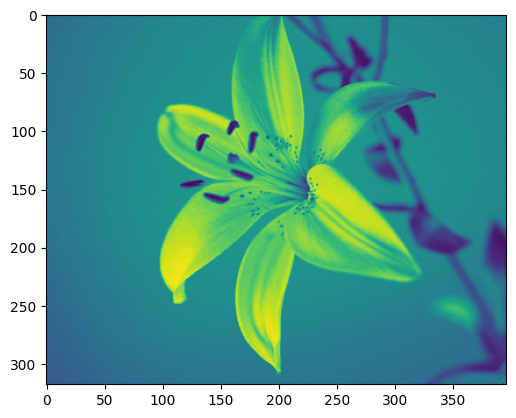

In [5]:
show_image(img)

Appliquer le filtre moyenné pour différentes valeurs de taille
de filtre (3,7,11) avec padding nécessaire pour conserver la dimension initiale de l’image

In [6]:
from tools import Conv2D, add_padding

In [7]:
# adding padding
padding = img.shape
padding

(318, 396)

In [8]:
padded_img = add_padding(img, padding=padding)
print(f'THE SHAPE OF THE ORIGINAL IMAGE IS {img.shape}')
print(f'THE SHAPE OF THE PADDED IMAGE IS {padded_img.shape}')

THE SHAPE OF THE ORIGINAL IMAGE IS (318, 396)
THE SHAPE OF THE PADDED IMAGE IS (954, 1188)


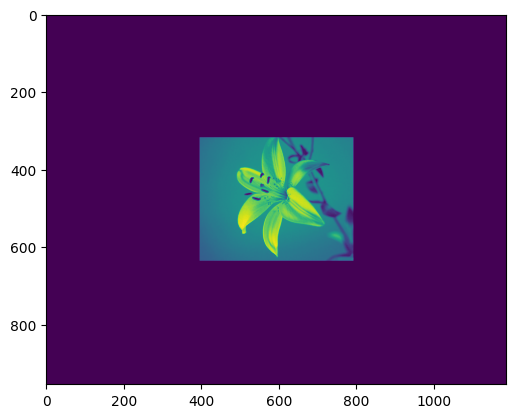

In [9]:
show_image(padded_img)

We apply the box kernel

In [10]:
kernel = np.ones((9,9), dtype=np.float32) / 9
stride = (1, 1)  
dilation = (1, 1)  
padding = (1,1)
padding_ = img.shape
# Apply convolution
# conv_img = Conv2D(matrix=img, padding=padding, kernel=kernel)
conv_img = Conv2D(add_padding(img, padding_),  kernel=kernel)


In [11]:
conv_img.shape

(946, 1180)

In [12]:
img.shape

(318, 396)

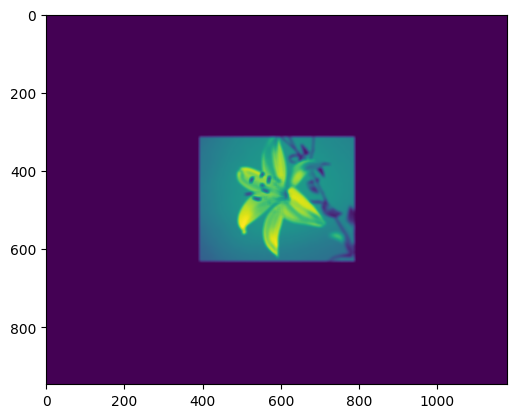

In [13]:
show_image(conv_img)

Appliquer le filtre moyenner pour différentes valeurs de taille
de filtre (3,7,11) avec padding nécessaire pour conserver la dimension initiale de l’image

In [14]:
def apply_filter(image: np.ndarray, filter_size: int, padding: Tuple[int, int]) -> np.ndarray:
    # Création du filtre moyenneur
    kernel = np.ones((filter_size, filter_size)) / (filter_size * filter_size)
    
    # Application du padding
    padded_image = np.pad(image, padding, mode='constant')
    
    # Application de la convolution avec le filtre et le padding spécifiés
    convolved_image = Conv2D(padded_image, kernel, padding=padding)
    
    return convolved_image


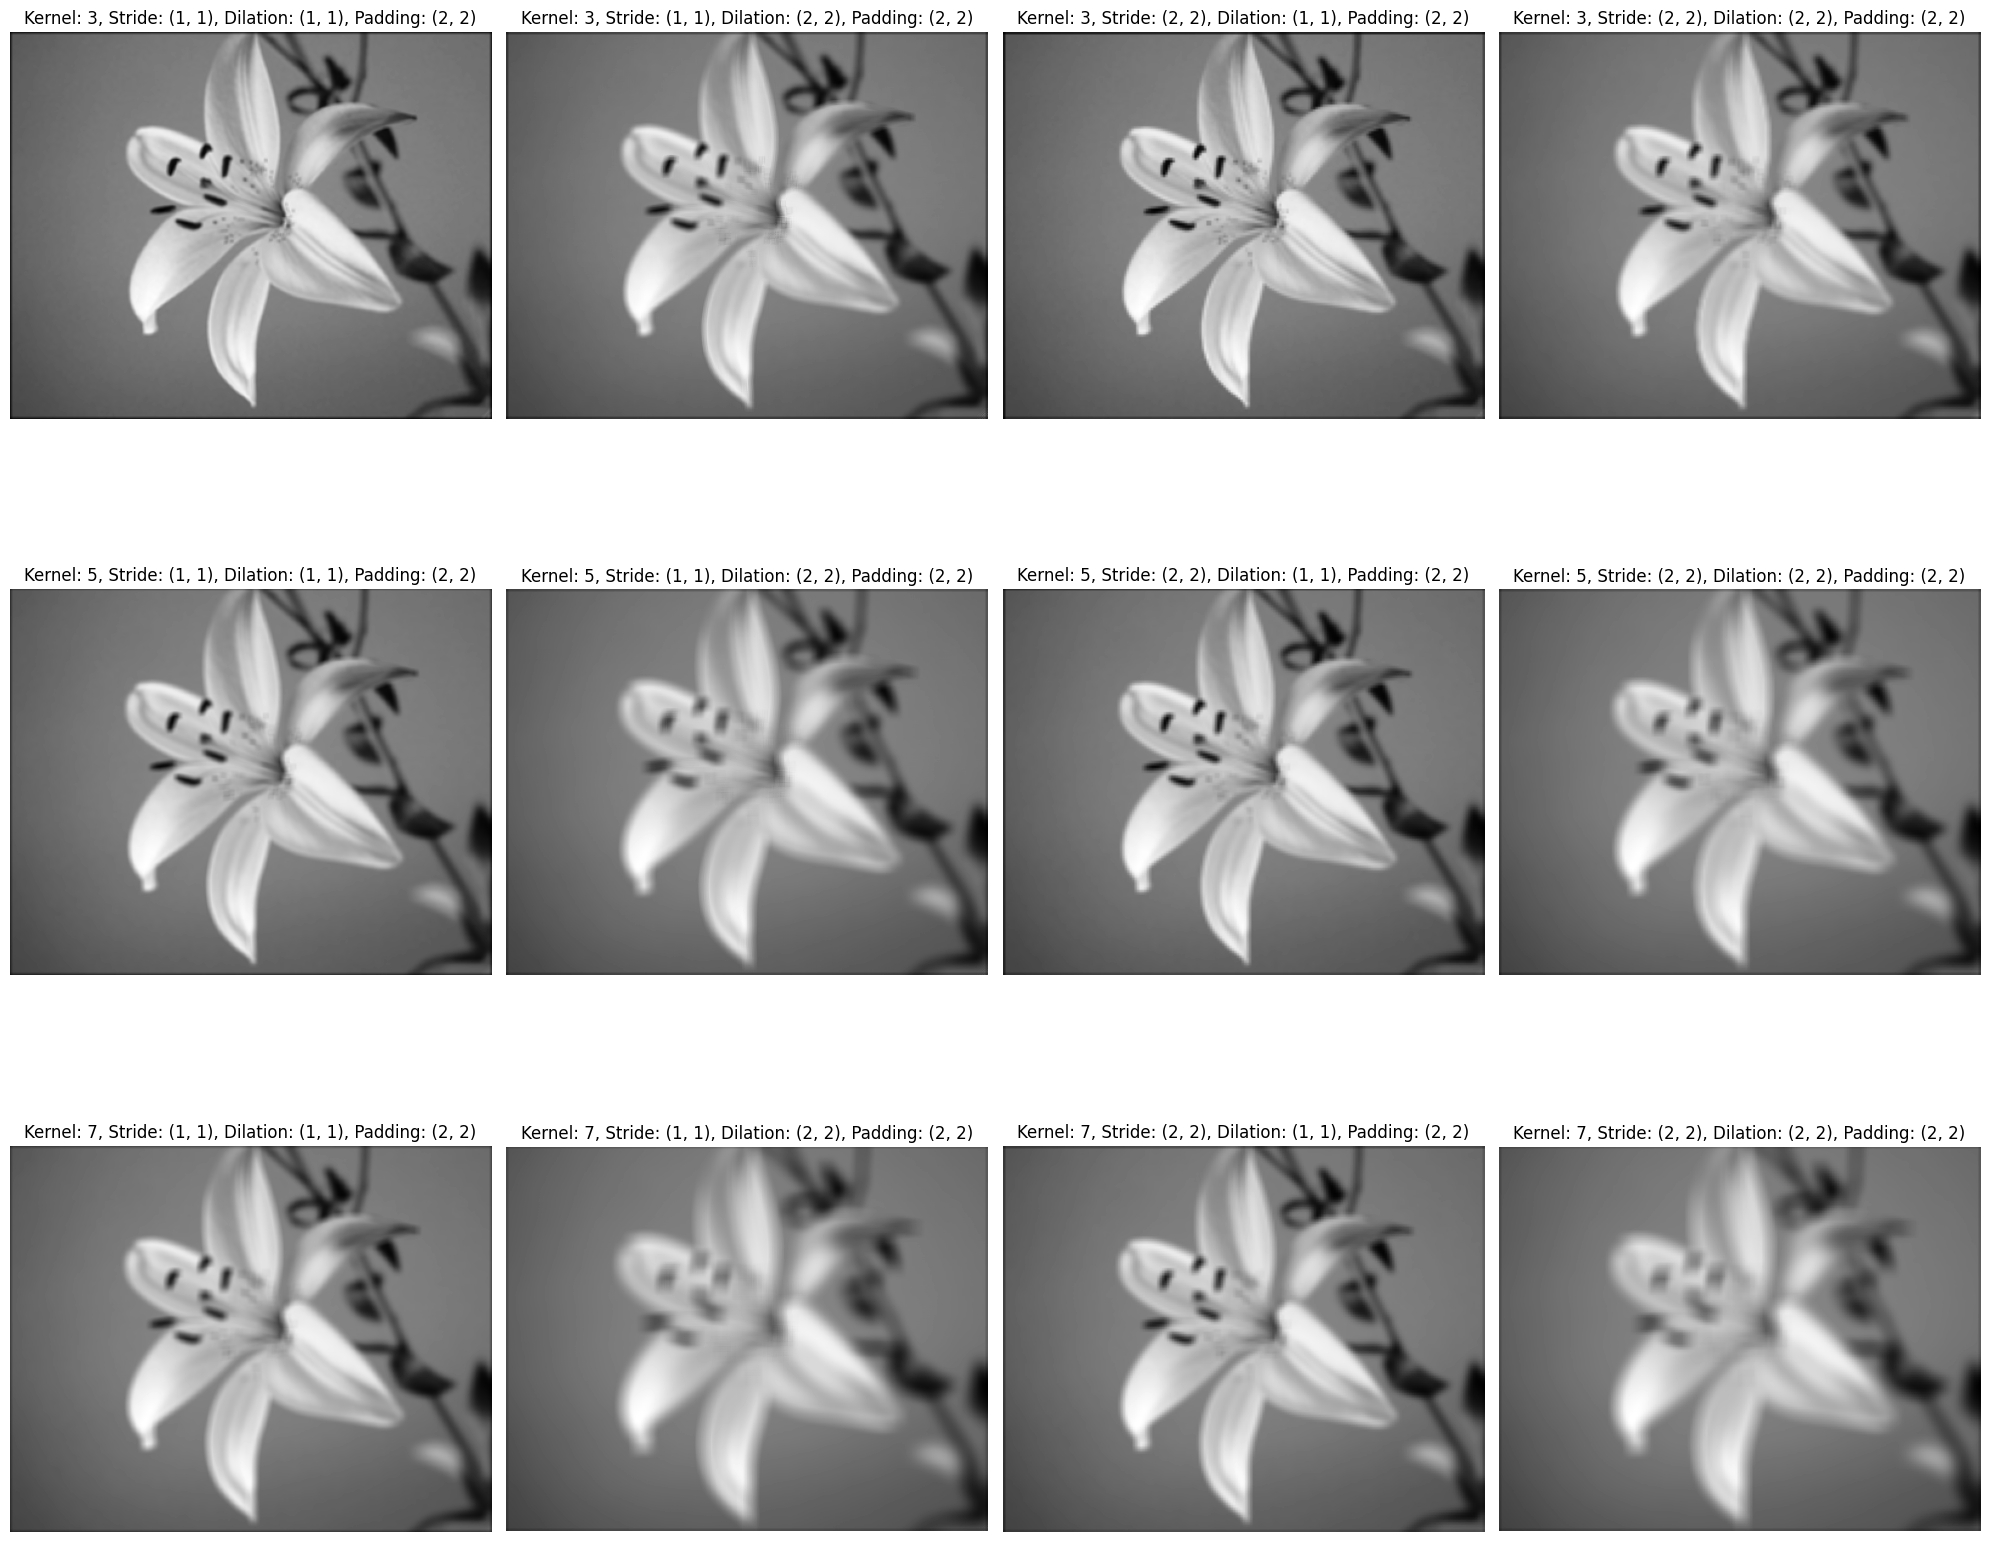

In [15]:
kernel_sizes = [3, 5, 7]  #
strides = [(1, 1), (2, 2)]  # Différentes valeurs de pas (stride)
dilations = [(1, 1), (2, 2)]  # Différentes valeurs de dilatation
paddings = [(1, 1), (2, 2)]  # Différentes valeurs de padding

fig, axes = plt.subplots(len(kernel_sizes), len(strides) * len(dilations), figsize=(20, 18))

for i, kernel_size in enumerate(kernel_sizes):
    for j, stride in enumerate(strides):
        for k, dilation in enumerate(dilations):
            for l, padding in enumerate(paddings):
                kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
                conv_img = Conv2D(matrix=img, kernel=kernel, stride=stride, dilation=dilation, padding=padding)
                axes[i, j * len(dilations) + k].imshow(conv_img, cmap='gray')
                axes[i, j * len(dilations) + k].set_title(f'Kernel: {kernel_size}, Stride: {stride}, Dilation: {dilation}, Padding: {padding}')
                axes[i, j * len(dilations) + k].axis('off')

plt.tight_layout()
plt.show()

In [16]:
tailles_filtre = [3, 7, 11]
strides = [2, 5, 11]
dilatations = [1, 3, 5]

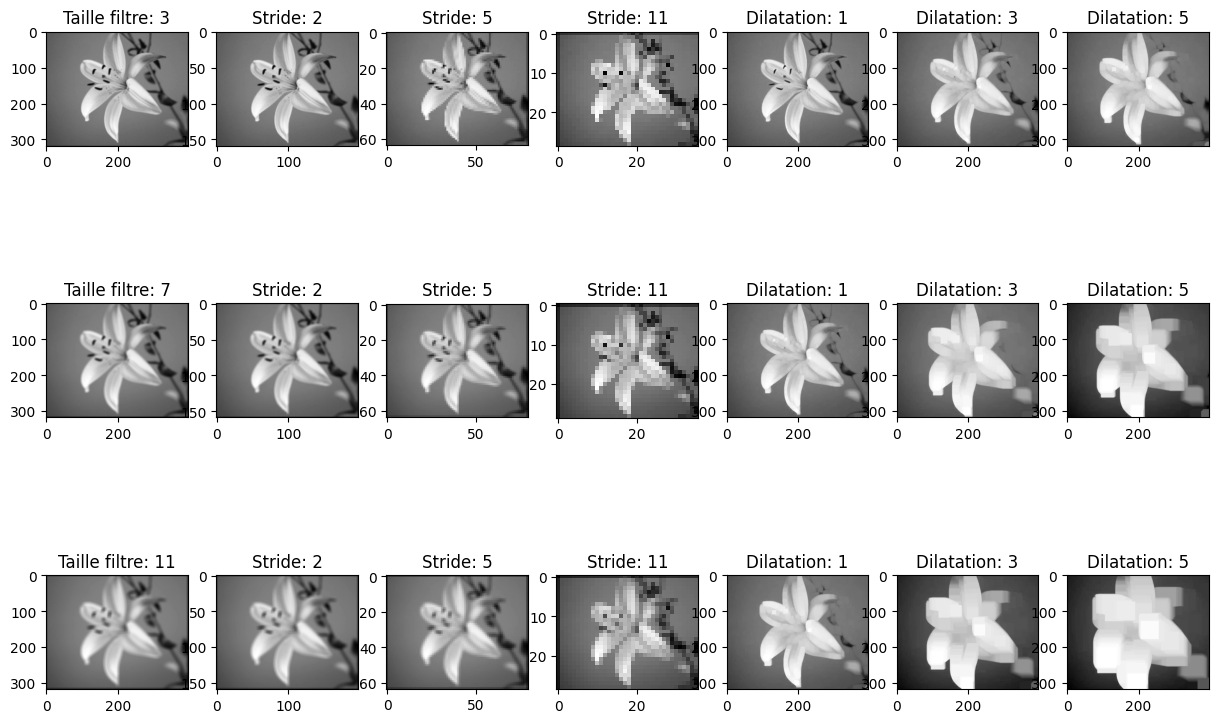

In [17]:
fig, axes = plt.subplots(len(tailles_filtre), 1+len(strides)+len(dilatations), figsize=(15, 10))

for i, taille in enumerate(tailles_filtre):
    kernel = np.ones((taille, taille), dtype=np.float32) / (taille * taille)
    conv_img = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)
    axes[i, 0].imshow(conv_img, cmap='gray')
    axes[i, 0].set_title(f'Taille filtre: {taille}')
    for j, stride in enumerate(strides):
        conv_img_stride = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)
        conv_img_stride = conv_img_stride[::stride, ::stride]
        axes[i, j+1].imshow(conv_img_stride, cmap='gray')
        axes[i, j+1].set_title(f'Stride: {stride}')
    for k, dilatation in enumerate(dilatations):
        kernel = np.ones((taille, taille), dtype=np.float32)
        conv_img_dilation = cv2.dilate(img, kernel, iterations=dilatation)
        axes[i, len(strides)+k+1].imshow(conv_img_dilation, cmap='gray')
        axes[i, len(strides)+k+1].set_title(f'Dilatation: {dilatation}')

plt.show()


 Automatiser le processus précédant. Créer une fonction pour la construction du filtre moyenneur à
l’instar de la fonction gaussian_mask. Faire une fonction filter_analysis qui prend en entrée une image
et la fonction du filtre souhaité et qui renvoi la figure des comparaisons

In [18]:
def mean_filter(size):
    kernel = np.ones((size, size), dtype=np.float32) / (size * size)
    return kernel

def filter_analysis(image, filter_function, filter_name, filter_args=None):
    if filter_args is None:
        filter_args = {}

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    filtered_image = Conv2D(matrix=image, kernel=filter_function(**filter_args))
    axes[1].imshow(filtered_image, cmap='gray')
    axes[1].set_title(f'Filtered Image ({filter_name})')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()



In [19]:

image = read_grayscale_image('figs\\flower.png')
filter_size = 5  
filter_analysis(image, mean_filter, "Mean Filter", {"size": filter_size})


ValueError: too many values to unpack (expected 2)

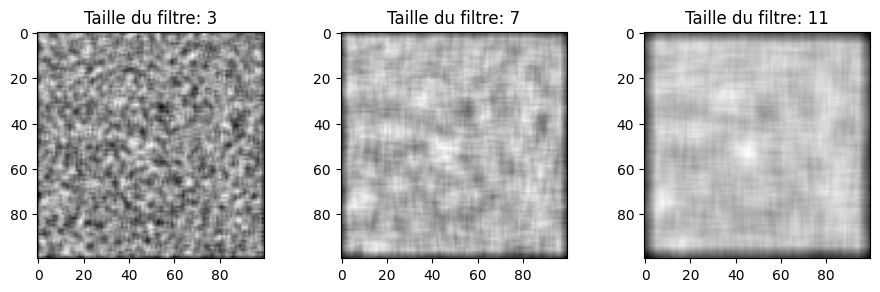

In [ ]:
# Définir les tailles de filtre et de stride/dilatation
tailles_filtre = [3, 7, 11]
strides_dilatations = [(2, 5, 11), (1, 3, 5)]

# Créer une figure pour afficher les résultats
plt.figure(figsize=(15, 10))

# Fonction de convolution avec padding
def convolution(image, taille_filtre):
    return cv2.filter2D(image, -1, np.ones((taille_filtre, taille_filtre), np.float32)/(taille_filtre * taille_filtre), borderType=cv2.BORDER_CONSTANT)

# Appliquer les filtres moyenneurs pour différentes valeurs de taille de filtre
for i, taille_filtre in enumerate(tailles_filtre):
    filtered_image = convolution(image, taille_filtre)
    plt.subplot(3, 4, i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"Taille du filtre: {taille_filtre}")

# Appliquer le stride et la dilatation sans padding
for i, (stride, dilatation) in enumerate(strides_dilatations):
    filtered_image = cv2.dilate(image, np.ones((dilatation, dilatation), np.uint8), iterations=1)
    filtered_image = cv2.resize(filtered_image, None, fx=1/stride, fy=1/stride, interpolation=cv2.INTER_NEAREST)
    plt.subplot(3, 4, 4+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"Stride: {stride}, Dilatation: {dilatation}")

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 21, not 24

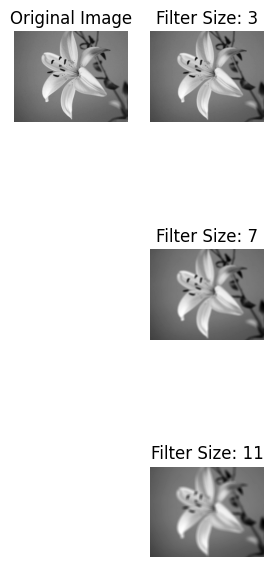

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_grayscale_image(file_path):
    # Lire l'image en niveaux de gris
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return img

def apply_convolution(image, kernel_size, stride, dilation):
    # Appliquer la convolution avec la fonction Conv2D
    result = Conv2D(image, np.ones((kernel_size, kernel_size)), stride=stride, dilation=dilation)
    return result

# Lire l'image en niveaux de gris
image = read_grayscale_image("figs\\flower.png")

# Définir différentes tailles de filtre
filter_sizes = [3, 7, 11]

# Définir différentes valeurs de stride et de dilation
strides = [(2, 2), (5, 5), (11, 11)]
dilations = [(1, 1), (3, 3), (5, 5)]

# Créer une figure pour afficher les résultats
num_rows = len(filter_sizes)
num_cols = len(strides) + len(dilations) + 1
plt.figure(figsize=(12, 8))

# Afficher l'image originale
plt.subplot(num_rows, num_cols, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Appliquer la convolution avec différentes tailles de filtre
for i, filter_size in enumerate(filter_sizes):
    result = apply_convolution(image, filter_size, stride=(1, 1), dilation=(1, 1))
    plt.subplot(num_rows, num_cols, i * num_cols + 2)
    plt.imshow(result, cmap='gray')
    plt.title(f'Filter Size: {filter_size}')
    plt.axis('off')

# Appliquer la convolution avec différentes valeurs de stride
for i, stride in enumerate(strides):
    result = apply_convolution(image, kernel_size=3, stride=stride, dilation=(1, 1))
    plt.subplot(num_rows, num_cols, len(filter_sizes) * num_cols + i + 3)
    plt.imshow(result, cmap='gray')
    plt.title(f'Stride: {stride}')
    plt.axis('off')

# Appliquer la convolution avec différentes valeurs de dilation
for i, dilation in enumerate(dilations):
    result = apply_convolution(image, kernel_size=3, stride=(1, 1), dilation=dilation)
    plt.subplot(num_rows, num_cols, len(filter_sizes) * num_cols + len(strides) + i + 3)
    plt.imshow(result, cmap='gray')
    plt.title(f'Dilation: {dilation}')
    plt.axis('off')

plt.tight_layout()
plt.show()
